An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

# Some business Objectives:
1. Retain customers,
2. Analyze relevant customer data,
3. Develop focused customer retention programs.
4. Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

# Data Analysis Process
Remember the process:

1. Case Study
2. Get data
3. Cleaning/Wrangling/EDA
4. Processing Data
5. Modeling -Validation
6. Reporting

# 1. Import the necessary libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# 3. First look at its main features (head, shape, info). NOTE The target column is total_claim_amount

In [3]:
customer_df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [4]:
customer_df.describe(include=[object]).T

,count,unique,top,freq
Customer,9134,9134,BU79786,1
State,9134,5,California,3150
Response,9134,2,No,7826
Coverage,9134,3,Basic,5568
Education,9134,5,Bachelor,2748
Effective To Date,9134,59,1/10/11,195
EmploymentStatus,9134,5,Employed,5698
Gender,9134,2,F,4658
Location Code,9134,3,Suburban,5779
Marital Status,9134,3,Married,5298


# 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [5]:
customer_df.columns=[e.lower().replace(' ', '_') for e in customer_df.columns]
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [6]:
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


# 5. Change effective to date column to datetime format.

In [7]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [8]:
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


# 6. Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.

In [9]:
numerical_df = customer_df.select_dtypes(include='number')
display(numerical_df.shape)
numerical_df

(9134, 8)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


# 7. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [10]:
numerical_df.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [11]:
def continuous_discrete(ndf):
    a = ndf.nunique()
    print(a.values)
    print(a.index)

   # if col.a >10
    #print continuous_df 
    #else col.nunique<10
    #print discrete_df

In [12]:
continuous_discrete(numerical_df)

[8041 5694  202   36  100    6    9 5106]
Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')


In [36]:
#function to separate discrete and continuous functions

def discrete_continuous(df):
    discrete= [col for col in df.columns if df[col].nunique()<11]
    continuous= [col for col in df.columns if df[col].nunique()>10]
    return df[discrete], df[continuous]

discrete_df, continuous_df= discrete_continuous(numerical_df)
display(discrete_continuous)
discrete_df

<function __main__.discrete_continuous(df)>

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1
...,...,...
9129,0,2
9130,0,1
9131,3,2
9132,0,3


In [37]:
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,198.234764
9130,3096.511217,21604,79,14,28,379.200000
9131,8163.890428,0,85,9,37,790.784983
9132,7524.442436,21941,96,34,3,691.200000


# 8. Plot a correlation matrix, comment what you see.

In [16]:
correlations_matrix = numerical_df.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


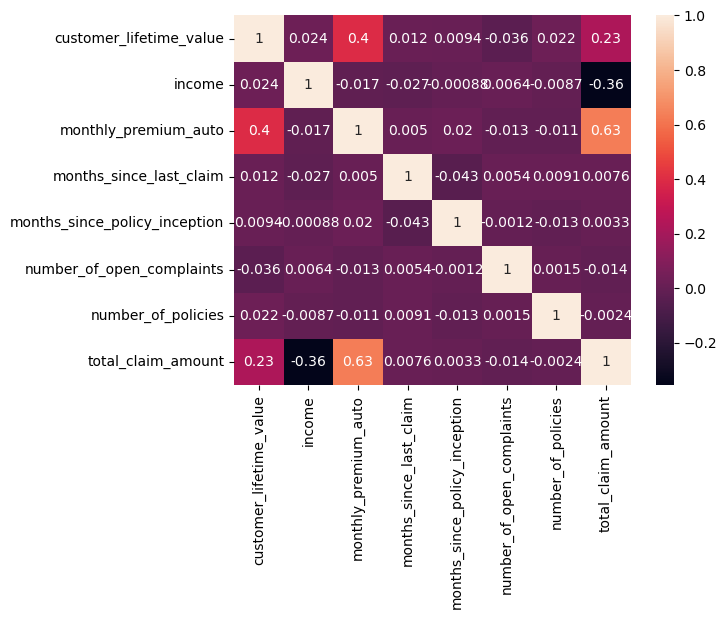

In [17]:
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [18]:
# total_claim_amount and customer_lifetime_value, income and monthly_premium auto have some correlations

# 9. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

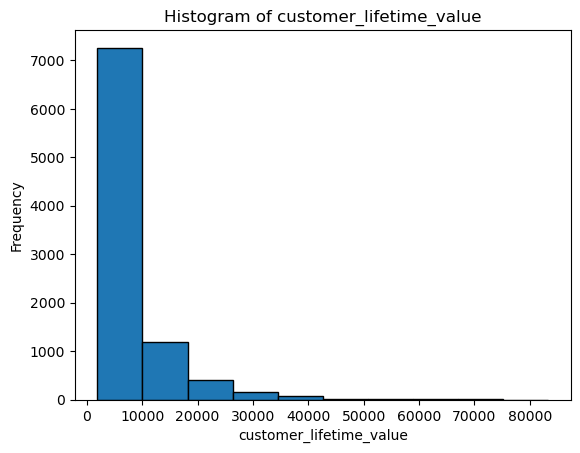

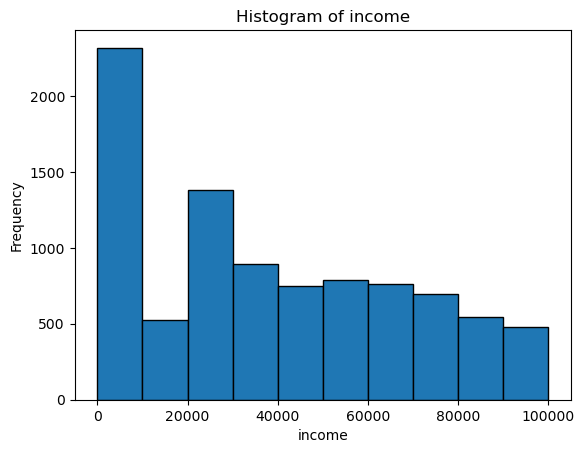

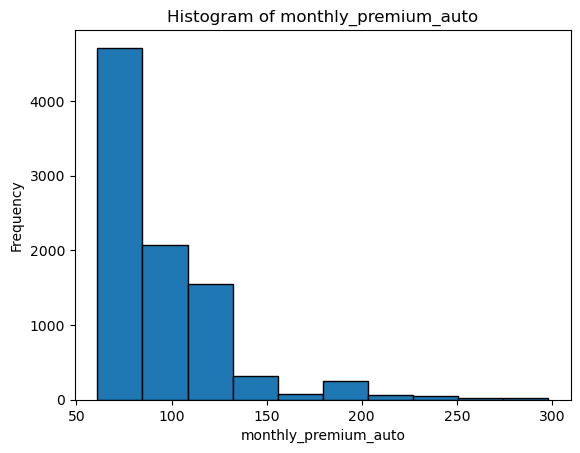

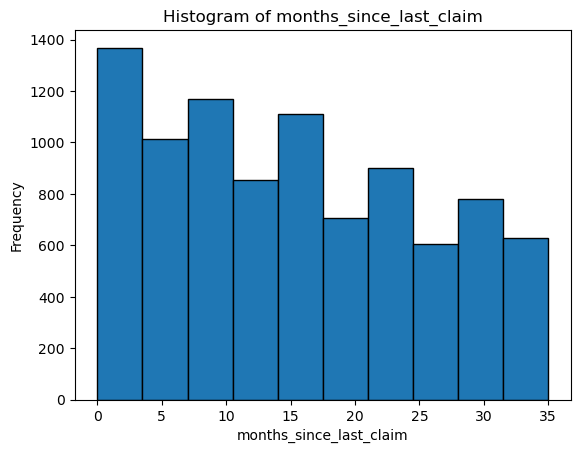

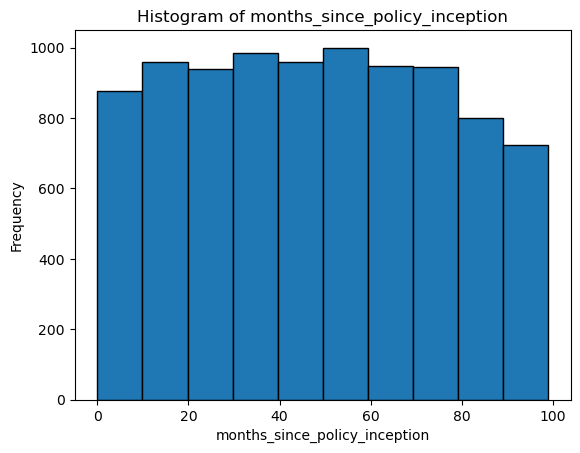

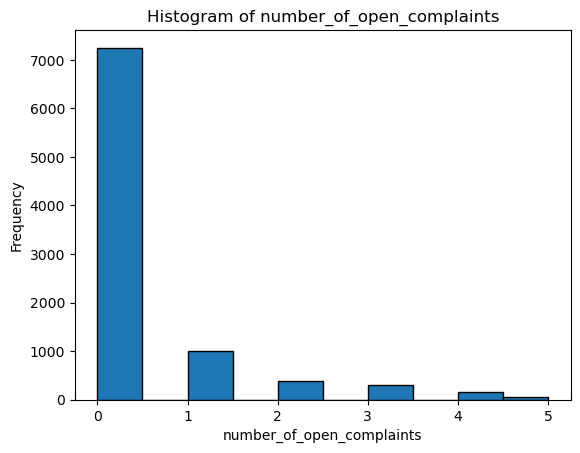

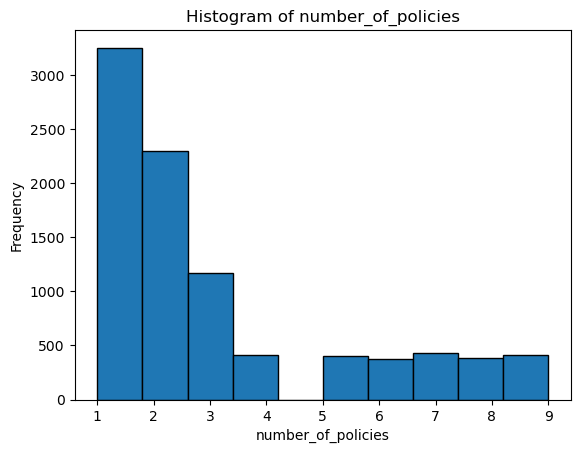

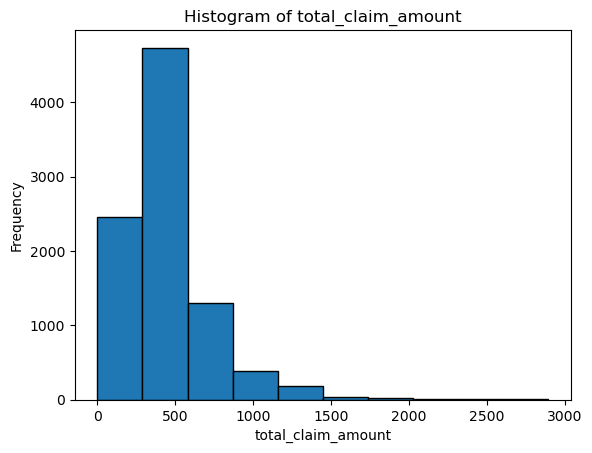

In [19]:
for col in numerical_df.columns:
    plt.hist(numerical_df[col], bins=10, edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

In [20]:
continuous_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'total_claim_amount'],
      dtype='object')

/var/folders/cc/r4673nsd0p39g5zf2x_pr6nw0000gn/T/ipykernel_14069/1363269016.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


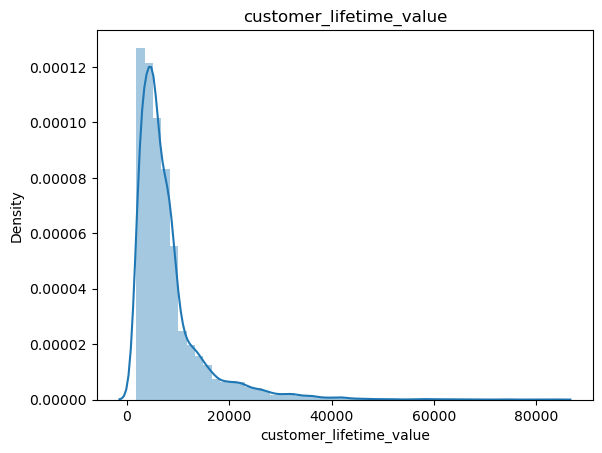

/var/folders/cc/r4673nsd0p39g5zf2x_pr6nw0000gn/T/ipykernel_14069/1363269016.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


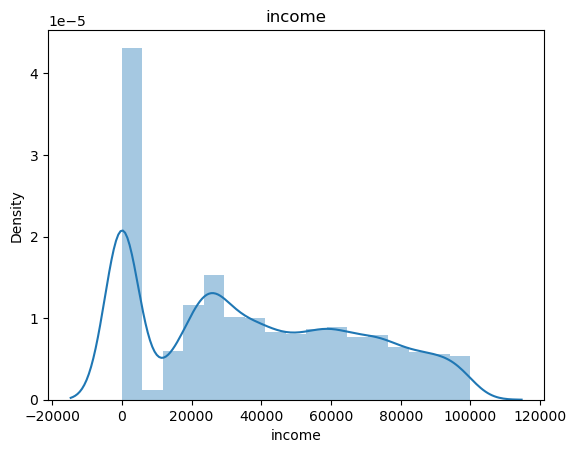

/var/folders/cc/r4673nsd0p39g5zf2x_pr6nw0000gn/T/ipykernel_14069/1363269016.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


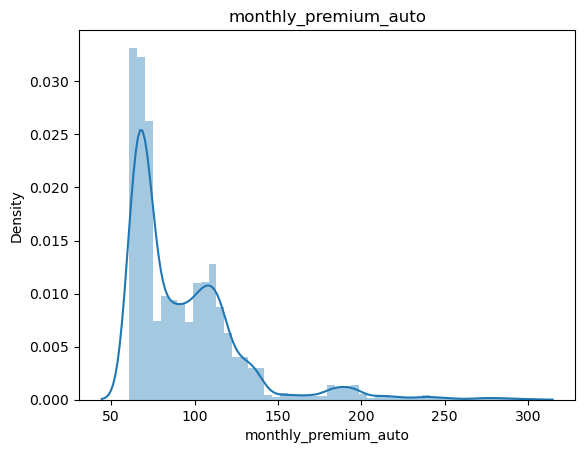

/var/folders/cc/r4673nsd0p39g5zf2x_pr6nw0000gn/T/ipykernel_14069/1363269016.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


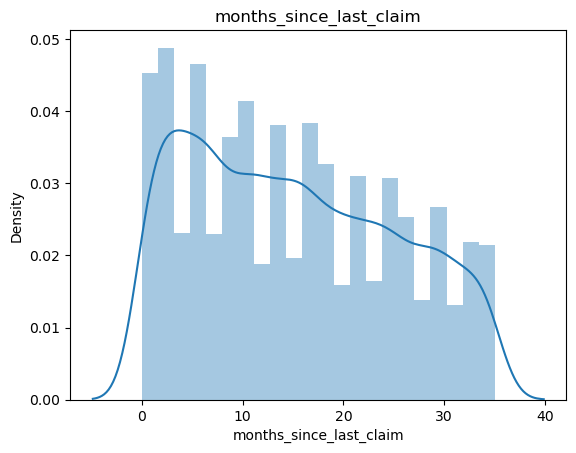

/var/folders/cc/r4673nsd0p39g5zf2x_pr6nw0000gn/T/ipykernel_14069/1363269016.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


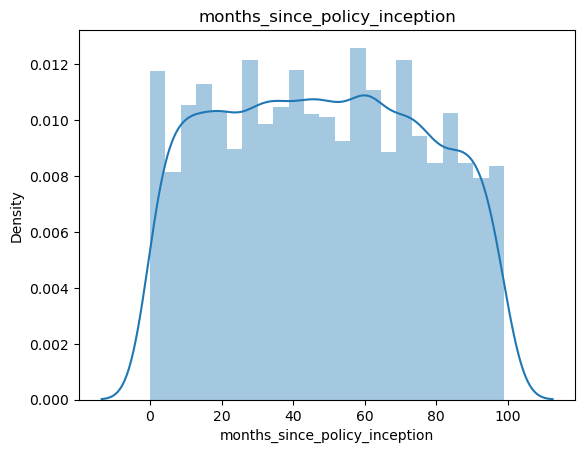

/var/folders/cc/r4673nsd0p39g5zf2x_pr6nw0000gn/T/ipykernel_14069/1363269016.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


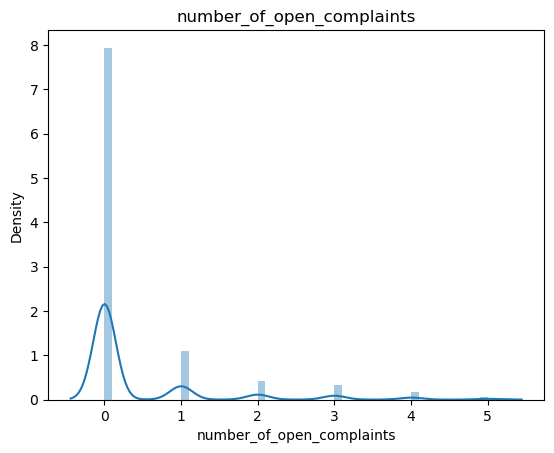

/var/folders/cc/r4673nsd0p39g5zf2x_pr6nw0000gn/T/ipykernel_14069/1363269016.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


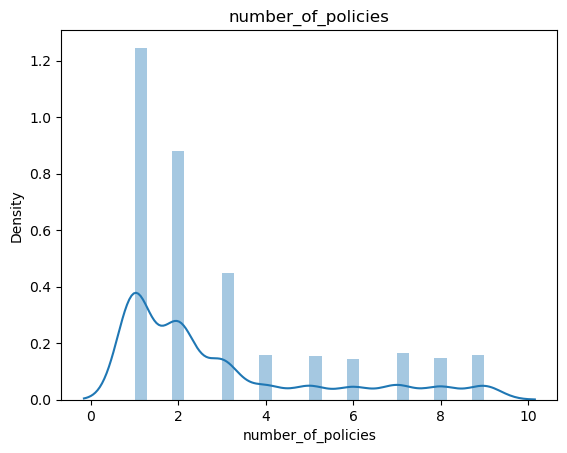

/var/folders/cc/r4673nsd0p39g5zf2x_pr6nw0000gn/T/ipykernel_14069/1363269016.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


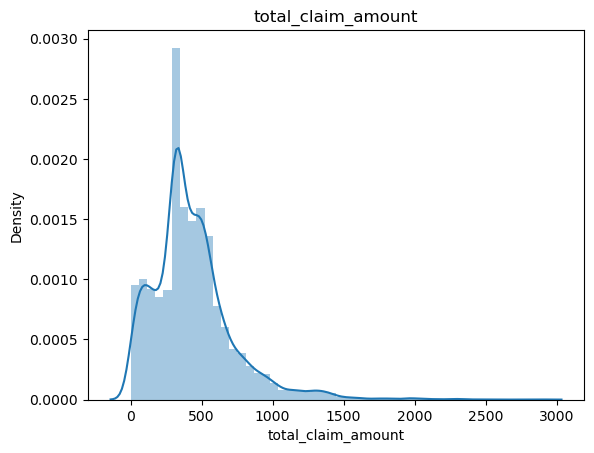

In [21]:
def plot_df(df):
    for col in df.columns:
        sns.distplot(df[col], kde=True)
        plt.title(col)
        plt.show()

plot_df(numerical_df)

# 10. Comment what you can see in the plots.

In [22]:
# None of them have a standard bell distribution. Most of them are right skewed and have long tails 

# 11. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

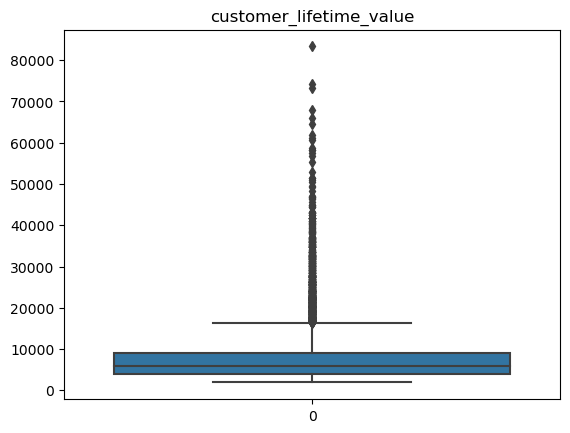

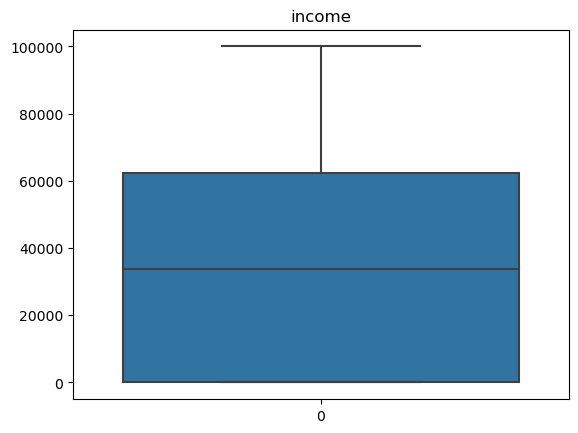

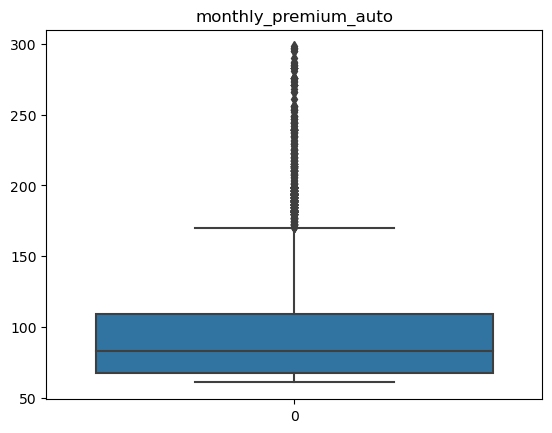

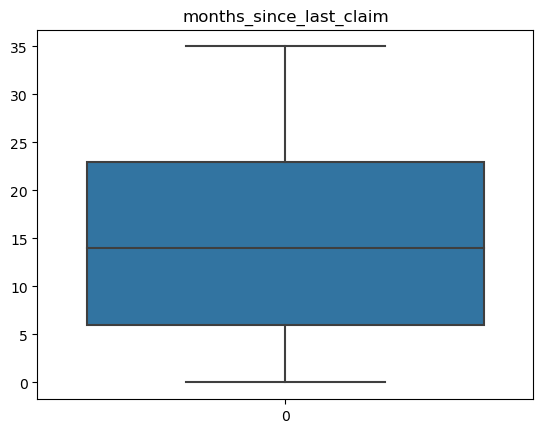

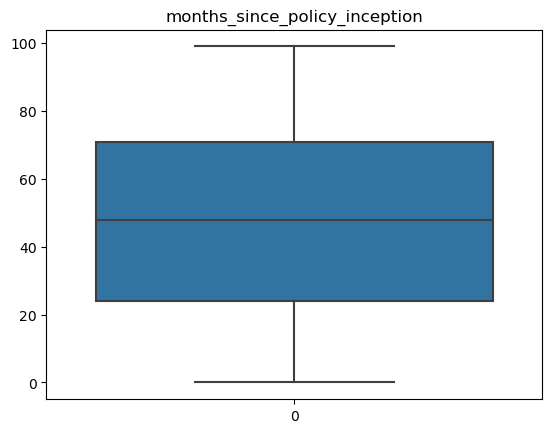

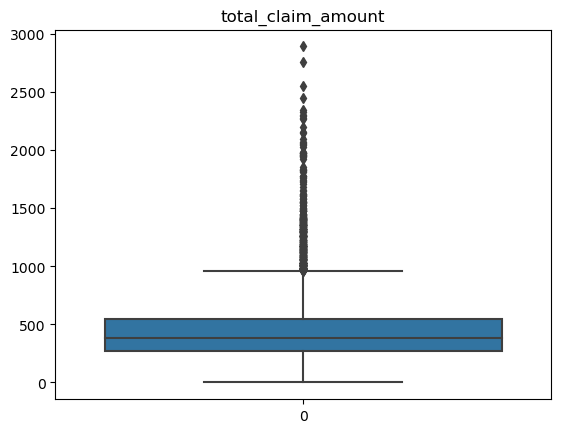

In [23]:
def boxplot_df(df):
    for col in df.columns:
        sns.boxplot(df[col])
        plt.title(col)
        plt.show()

boxplot_df(continuous_df)

# 12. Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe.

In [24]:
customer_lifetime_value_iqr = np.nanpercentile(continuous_df['customer_lifetime_value'],75) - np.nanpercentile(continuous_df['customer_lifetime_value'],25)
customer_lifetime_value_upper_limit = np.nanpercentile(continuous_df['customer_lifetime_value'],75) + 1.5*customer_lifetime_value_iqr

extraordinary_points1 = continuous_df[continuous_df['customer_lifetime_value'] > customer_lifetime_value_upper_limit]

len(extraordinary_points1)/len(continuous_df)

0.08944602583753011

In [25]:
monthly_premium_auto_iqr = np.nanpercentile(continuous_df['monthly_premium_auto'],75) - np.nanpercentile(continuous_df['monthly_premium_auto'],25)
monthly_premium_auto_upper_limit = np.nanpercentile(continuous_df['monthly_premium_auto'],75) + 1.5*monthly_premium_auto_iqr

extraordinary_points2 = continuous_df[continuous_df['monthly_premium_auto'] > monthly_premium_auto_upper_limit]

len(extraordinary_points2)/len(continuous_df)

0.047076855703963215

In [26]:
# if we remove the outliers from customer_lifetime_value (8.9% of the data) &  Monthly_premium_auto (4.7% of the data) we could miss out of some very HNI individuals would might be the biggest donors.

# 13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

In [27]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

# 14. Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [28]:
numerical_df.to_csv('numerical.csv', index=False)

In [29]:
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


# Lab 2 - Lab | Cleaning categorical data.

# Data Analysis Process

Remember the process:
1. Case Study
2. Get data
3. Cleaning/Wrangling/EDA
4. Processing Data
5. Modeling -Validation
6. Reporting

1. Open the notebook created for Lab-cleaning-numerical-data.

# 2. Find all of the categorical data. Save it in a categorical_df variable.

In [38]:
customer_df.describe(include=[object]).T

,count,unique,top,freq
customer,9134,9134,BU79786,1
state,9134,5,California,3150
response,9134,2,No,7826
coverage,9134,3,Basic,5568
education,9134,5,Bachelor,2748
employmentstatus,9134,5,Employed,5698
gender,9134,2,F,4658
location_code,9134,3,Suburban,5779
marital_status,9134,3,Married,5298
policy_type,9134,3,Personal Auto,6788


In [39]:
categorical_df = customer_df.select_dtypes(include='object')
categorical_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


# 3. Check for NaN values and decide what to do with them, do it now.

In [40]:
categorical_df.isna().sum()/len(categorical_df)

customer            0.0
state               0.0
response            0.0
coverage            0.0
education           0.0
employmentstatus    0.0
gender              0.0
location_code       0.0
marital_status      0.0
policy_type         0.0
policy              0.0
renew_offer_type    0.0
sales_channel       0.0
vehicle_class       0.0
vehicle_size        0.0
dtype: float64

In [ ]:
# no NAN values

# 4 Check all unique values of columns.

In [51]:
def cat_unique(df):
    for col in df.columns:
        if col!='customer':
            print(col,list(df[col].unique()))

cat_unique(categorical_df)

state ['Washington', 'Arizona', 'Nevada', 'California', 'Oregon']
response ['No', 'Yes']
coverage ['Basic', 'Extended', 'Premium']
education ['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor']
employmentstatus ['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired']
gender ['F', 'M']
location_code ['Suburban', 'Rural', 'Urban']
marital_status ['Married', 'Single', 'Divorced']
policy_type ['Corporate Auto', 'Personal Auto', 'Special Auto']
policy ['C3', 'P3', 'C2', 'P1', 'S2', 'C1', 'P2', 'S1', 'S3']
renew_offer_type ['O1', 'O3', 'O2', 'O4']
sales_channel ['Agent', 'Call Center', 'Web', 'Branch']
vehicle_class ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car', 'Luxury Car']
vehicle_size ['Medsize', 'Small', 'Large']


In [42]:
categorical_df.nunique


<bound method DataFrame.nunique of      customer       state response  coverage education employmentstatus  \
0     BU79786  Washington       No     Basic  Bachelor         Employed   
1     QZ44356     Arizona       No  Extended  Bachelor       Unemployed   
2     AI49188      Nevada       No   Premium  Bachelor         Employed   
3     WW63253  California       No     Basic  Bachelor       Unemployed   
4     HB64268  Washington       No     Basic  Bachelor         Employed   
...       ...         ...      ...       ...       ...              ...   
9129  LA72316  California       No     Basic  Bachelor         Employed   
9130  PK87824  California      Yes  Extended   College         Employed   
9131  TD14365  California       No  Extended  Bachelor       Unemployed   
9132  UP19263  California       No  Extended   College         Employed   
9133  Y167826  California       No  Extended   College       Unemployed   

     gender location_code marital_status     policy_type        

In [43]:
categorical_df.nunique()

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

# 5. Check dtypes. Do they all make sense as categorical data?

In [44]:
categorical_df.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [45]:
#A categorical variable has a finite number of categories or labels for its values. All categorial columns make sense

# 6. Does any column contain alpha and numeric data? Decide how to clean it and do it now.

In [46]:
categorical_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [ ]:
#Alpha Numeric columns: policy, renew_offer_type, customer
# Customer  is a unique identifier for each customer. We will not need this column for modelling.

In [47]:
categorical_df['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [48]:
categorical_df['policy'] = categorical_df['policy'].str[0]+categorical_df['policy'].str[-1]
categorical_df['policy'].value_counts()

P3    3426
P2    2122
P1    1240
C3    1014
C2     595
C1     359
S2     164
S3     148
S1      66
Name: policy, dtype: int64

In [49]:
categorical_df['renew_offer_type'].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

In [50]:
categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].str[0]+categorical_df['renew_offer_type'].str[-1]
categorical_df['renew_offer_type'].value_counts()

O1    3752
O2    2926
O3    1432
O4    1024
Name: renew_offer_type, dtype: int64

# 7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.

In [52]:
categorical_df['vehicle_size'] = categorical_df['vehicle_size'].replace({'Small':1,'Medsize':2,'Large':3})

categorical_df['vehicle_size']

0       2
1       2
2       2
3       2
4       2
       ..
9129    2
9130    2
9131    2
9132    3
9133    2
Name: vehicle_size, Length: 9134, dtype: int64

In [53]:
categorical_df['coverage'] = categorical_df['coverage'].replace({'Basic':1,'Extended':2,'Premium':3})

categorical_df['coverage']

0       1
1       2
2       3
3       1
4       1
       ..
9129    1
9130    2
9131    2
9132    2
9133    2
Name: coverage, Length: 9134, dtype: int64

# 8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

In [55]:
pd.crosstab(categorical_df['policy_type'],categorical_df['policy'],margins=False)

policy,C1,C2,C3,P1,P2,P3,S1,S2,S3
policy_type,,,,,,,,,
Corporate Auto,359,595,1014,0,0,0,0,0,0
Personal Auto,0,0,0,1240,2122,3426,0,0,0
Special Auto,0,0,0,0,0,0,66,164,148


In [ ]:
#we can see that the both the columns store same information; however 'policy' contains more specific information
#it is better to drop 'policy_type' as it is generalized and retain 'policy'

In [56]:
categorical_df['policy_type']=categorical_df['policy'].str[0]
categorical_df['policy_level']=categorical_df['policy'].str[-1]
categorical_df.drop('policy',axis=1,inplace=True)

In [57]:
categorical_df


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size,policy_level
0,BU79786,Washington,No,1,Bachelor,Employed,F,Suburban,Married,C,O1,Agent,Two-Door Car,2,3
1,QZ44356,Arizona,No,2,Bachelor,Unemployed,F,Suburban,Single,P,O3,Agent,Four-Door Car,2,3
2,AI49188,Nevada,No,3,Bachelor,Employed,F,Suburban,Married,P,O1,Agent,Two-Door Car,2,3
3,WW63253,California,No,1,Bachelor,Unemployed,M,Suburban,Married,C,O1,Call Center,SUV,2,2
4,HB64268,Washington,No,1,Bachelor,Employed,M,Rural,Single,P,O1,Agent,Four-Door Car,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,1,Bachelor,Employed,M,Urban,Married,P,O2,Web,Four-Door Car,2,1
9130,PK87824,California,Yes,2,College,Employed,F,Suburban,Divorced,C,O1,Branch,Four-Door Car,2,3
9131,TD14365,California,No,2,Bachelor,Unemployed,M,Suburban,Single,C,O1,Branch,Four-Door Car,2,2
9132,UP19263,California,No,2,College,Employed,M,Suburban,Married,P,O3,Branch,Four-Door Car,3,2


# 9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [58]:
categorical_df['education'].value_counts()


Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

'Master' and 'Doctor' can be grouped together under 'University'.
Not grouping bachelor as it already has a lot of values

In [64]:
categorical_df['education']=np.where(categorical_df['education'].isin(['Master','Doctor']),'University',categorical_df['education'])
print(categorical_df['education'].value_counts())

Bachelor                2748
College                 2681
High School or Below    2622
University              1083
Name: education, dtype: int64


In [61]:
categorical_df['employmentstatus'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

Consolidating lower frequency employmentstatus values into Other.

In [65]:
categorical_df['employmentstatus'] = np.where(categorical_df['employmentstatus'].isin(['Disabled','Retired','Medical Leave']) , 'Other', categorical_df['employmentstatus'])
print(categorical_df['employmentstatus'].value_counts())

Employed      5698
Unemployed    2317
Other         1119
Name: employmentstatus, dtype: int64


In [63]:
categorical_df['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

Consolidating Sports Car, Luxury SUV & Luxury Car vehicle_class values into Luxury.

In [66]:
categorical_df['vehicle_class'] = np.where(categorical_df['vehicle_class'].isin(['Sports Car','Luxury SUV','Luxury Car']) , 'Luxury', categorical_df['vehicle_class'])

print(categorical_df['vehicle_class'].value_counts())

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Luxury            831
Name: vehicle_class, dtype: int64


# 10. Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

In [67]:
categorical_df = categorical_df.drop(['customer'], axis=1)
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size,policy_level
0,Washington,No,1,Bachelor,Employed,F,Suburban,Married,C,O1,Agent,Two-Door Car,2,3
1,Arizona,No,2,Bachelor,Unemployed,F,Suburban,Single,P,O3,Agent,Four-Door Car,2,3
2,Nevada,No,3,Bachelor,Employed,F,Suburban,Married,P,O1,Agent,Two-Door Car,2,3
3,California,No,1,Bachelor,Unemployed,M,Suburban,Married,C,O1,Call Center,SUV,2,2
4,Washington,No,1,Bachelor,Employed,M,Rural,Single,P,O1,Agent,Four-Door Car,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,1,Bachelor,Employed,M,Urban,Married,P,O2,Web,Four-Door Car,2,1
9130,California,Yes,2,College,Employed,F,Suburban,Divorced,C,O1,Branch,Four-Door Car,2,3
9131,California,No,2,Bachelor,Unemployed,M,Suburban,Single,C,O1,Branch,Four-Door Car,2,2
9132,California,No,2,College,Employed,M,Suburban,Married,P,O3,Branch,Four-Door Car,3,2


In [68]:
categorical_df.to_csv('categorical.csv', index=False)